In [1]:
from model_phantom_DB import *
from linares_plot import * 
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'png' ## 'svg'

%load_ext autoreload
%autoreload 2


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


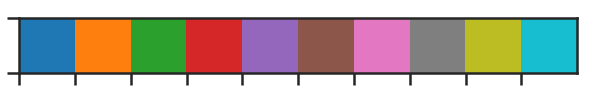

In [2]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(100/2) ;


nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+57) )/360)
p_dist2 = int((N * (90+170) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [3]:
def hemap(an, stimulation, order):
    dims=np.shape(an[4])
    stimon = 100/2
    stimoff = 100/2 + floor(100/2) ;
    stim2on = 1000/2
    stim2off = 1000/2 + floor(100/2) ;  
    
    RE_sorted=flipud(an[4])
    ax = sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=18,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 6, 12, 18], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    
    if order==1:
        plt.gca().plot([stimon, stimon+400], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=3) 
    if order==2:
        plt.gca().plot([500, 900], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t) 
    #   
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    #plt.gca().set_yticklabels(['0','','$^\pi$', '', '2$^\pi$'])
    plt.gca().set_yticklabels(['0','','180', '', '360'])
    
    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(570, -45)
    
    ##line stims       
    plt.plot([0, stimon], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stimon, stimon], [-15, -40], 'k-', linewidth=3)
    plt.plot([stimon, stimoff], [-40, -40], 'k-', linewidth=3)
    plt.plot([stimoff, stimoff], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stimoff, stim2on], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stim2on, stim2on], [-15, -40], 'k-', linewidth=3)
    plt.plot([stim2on, stim2off], [-40, -40], 'k-', linewidth=3)
    plt.plot([stim2off, stim2off], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stim2off, dims[1]], [-15, -15], 'k-', linewidth=3)
    #time
    plt.plot([dims[1]-500, dims[1]], [540, 540], 'k-', linewidth=3)
    plt.text(dims[1]-300, 600, '1s', fontsize=20)
    # stimulation
    if stimulation=='ON':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='w', fontsize=20)
    if stimulation=='OFF':
        plt.text(dims[1]-300, 70, stimulation, weight= 'heavy', color='k', fontsize=20)

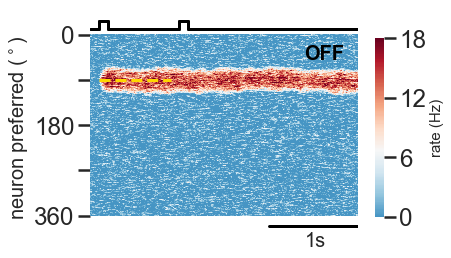

In [18]:
### OFF 

fee=1
fei=1
fie=1
fii=1

%config InlineBackend.figure_format = 'png' ## 'svg'

off_far_1= model(totalTime= 3000, targ_onset_1=100, targ_onset_2=4000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(off_far_1, stimulation='OFF', order=1)
plt.show()

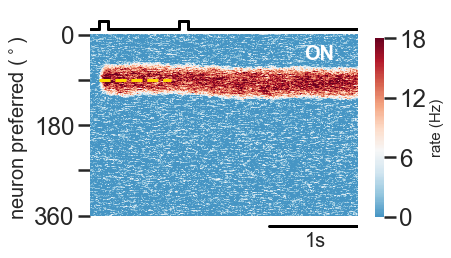

In [19]:
### ON 

on_far_1= model(totalTime=3000, targ_onset_1=100, targ_onset_2=4000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)


hemap(on_far_1, stimulation='ON', order=1)
plt.show()

### NB stimulation decreases tuning???

![NB stim changes tuning](loss_tuning_paper_figure.png)